In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fbpp = pd.read_csv("Flight_Booking.csv")

In [4]:
fbpp.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


### EDA

In [29]:
fbpp = fbpp.drop(['Unnamed: 0'], axis = 1)
fbpp.head(10)

KeyError: "['Unnamed: 0'] not found in axis"

In [6]:
fbpp.shape

(300153, 11)

In [7]:
fbpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
fbpp.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
fbpp.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Data Visualization

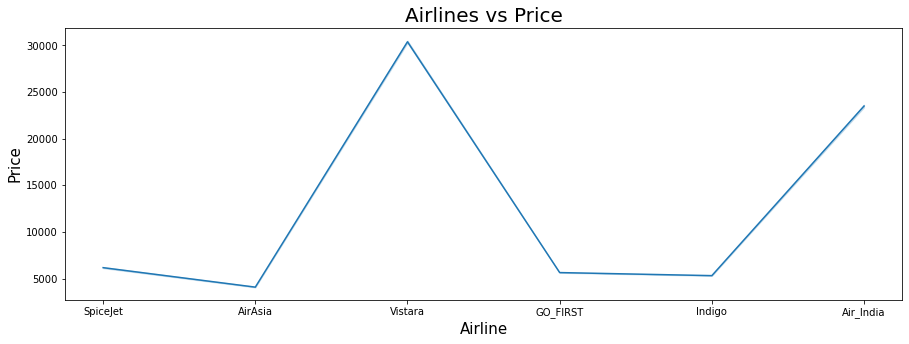

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x = fbpp['airline'], y = fbpp['price'])
plt.title('Airlines vs Price', fontsize = 20)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

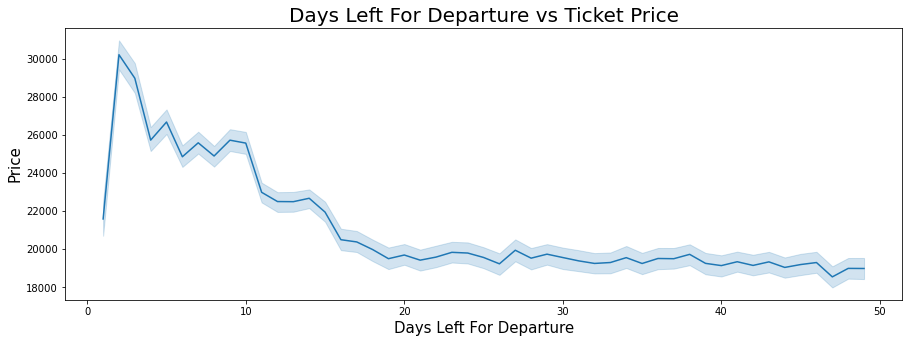

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(data = fbpp, x = 'days_left', y = 'price')
plt.title('Days Left For Departure vs Ticket Price', fontsize = 20)
plt.xlabel('Days Left For Departure', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

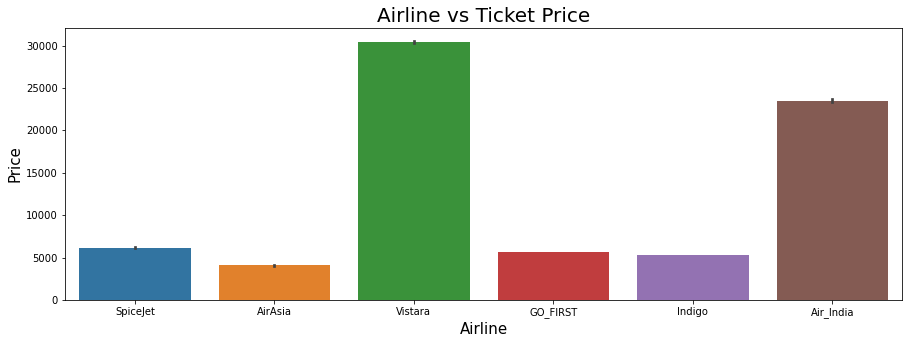

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'airline', y = 'price', data = fbpp)
plt.title('Airline vs Ticket Price', fontsize = 20)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

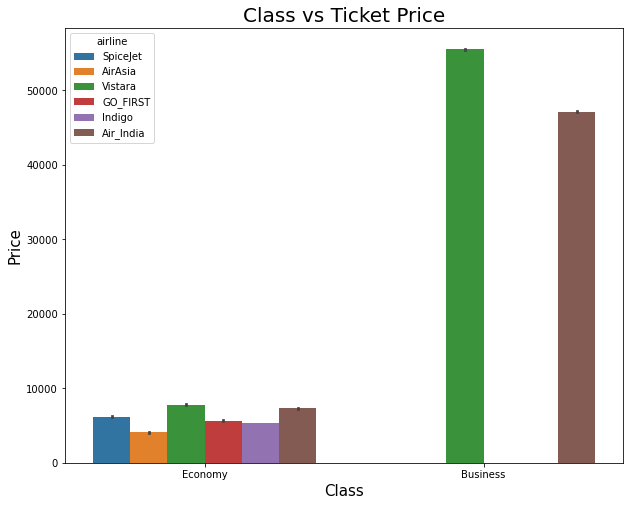

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'class', y = 'price', data = fbpp,hue='airline')
plt.title('Class vs Ticket Price', fontsize = 20)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

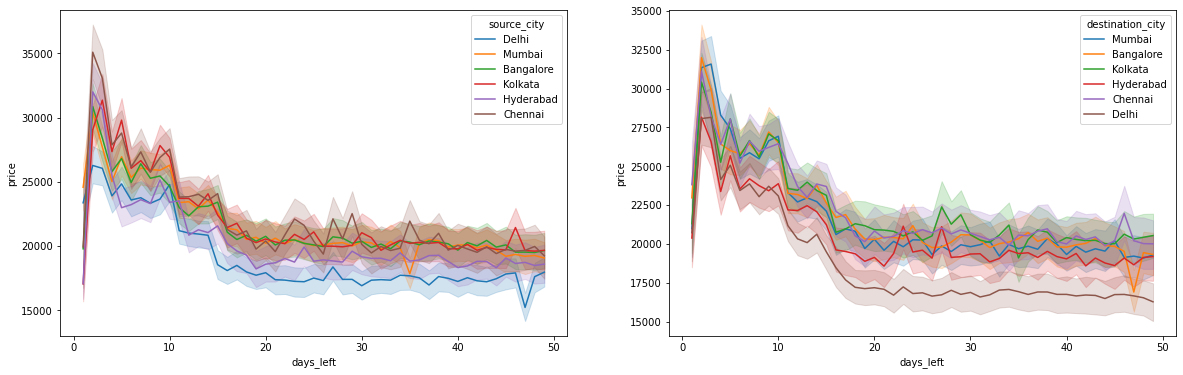

In [17]:
fig,ax = plt.subplots(1,2, figsize = (20,6))
sns.lineplot(x = 'days_left', y = 'price', data = fbpp, hue='source_city', ax = ax[0])
sns.lineplot(x = 'days_left', y = 'price', data = fbpp, hue='destination_city', ax = ax[1])
plt.show()

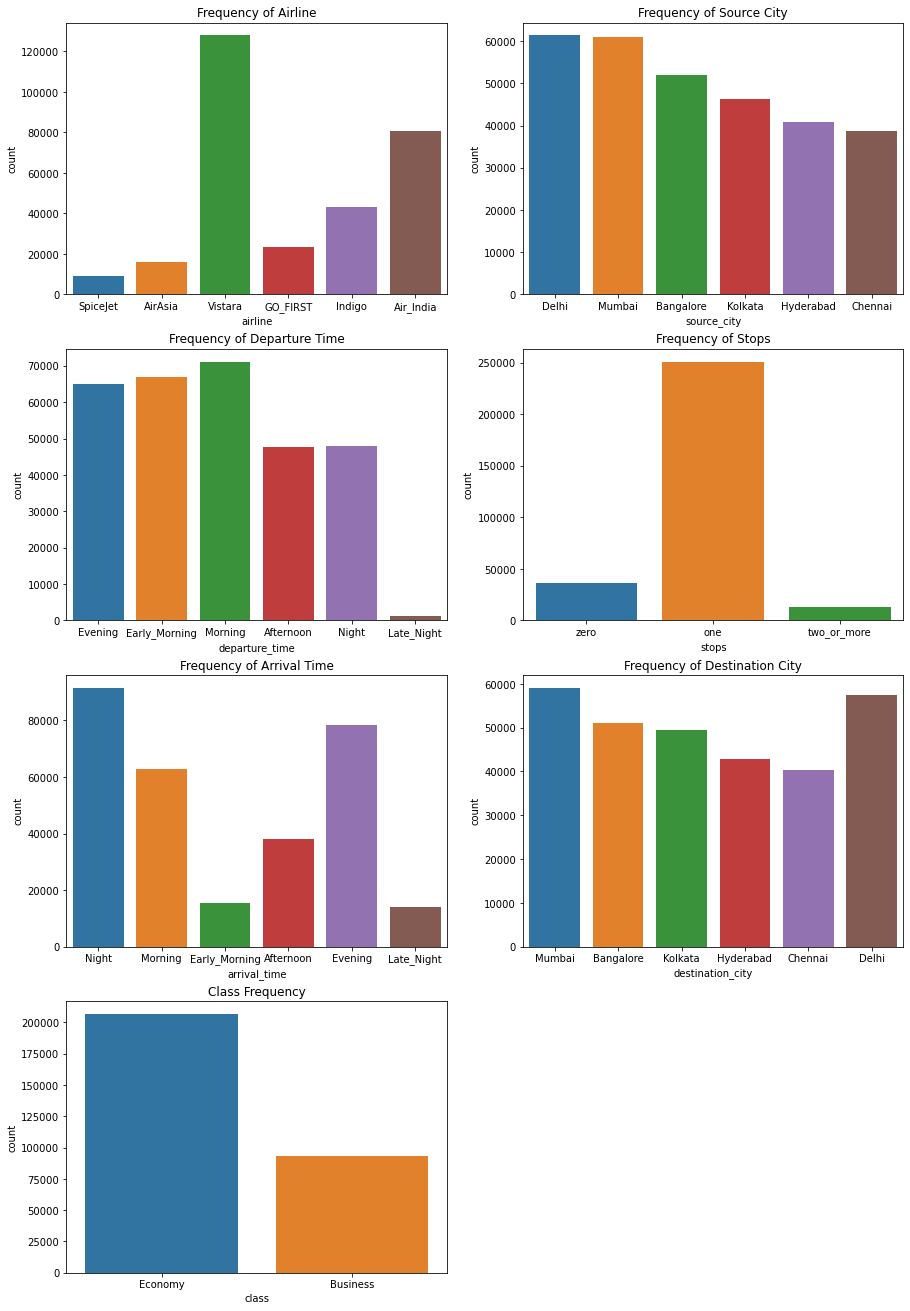

In [18]:
plt.figure(figsize=(15,23))

plt.subplot(4, 2, 1)
sns.countplot(x = fbpp['airline'], data = fbpp)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x = fbpp['source_city'], data = fbpp)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x = fbpp['departure_time'], data = fbpp)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x = fbpp['stops'], data = fbpp)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x = fbpp['arrival_time'], data = fbpp)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x = fbpp['destination_city'], data = fbpp)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x = fbpp['class'], data = fbpp)
plt.title("Class Frequency")

plt.show()

### Data Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
fbpp['airline'] = le.fit_transform(fbpp['airline'])
fbpp['source_city'] = le.fit_transform(fbpp['source_city'])
fbpp['departure_time'] = le.fit_transform(fbpp['departure_time'])
fbpp['stops'] = le.fit_transform(fbpp['stops'])
fbpp['arrival_time'] = le.fit_transform(fbpp['arrival_time'])
fbpp['destination_city'] = le.fit_transform(fbpp['destination_city'])
fbpp['class'] = le.fit_transform(fbpp['class'])
fbpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


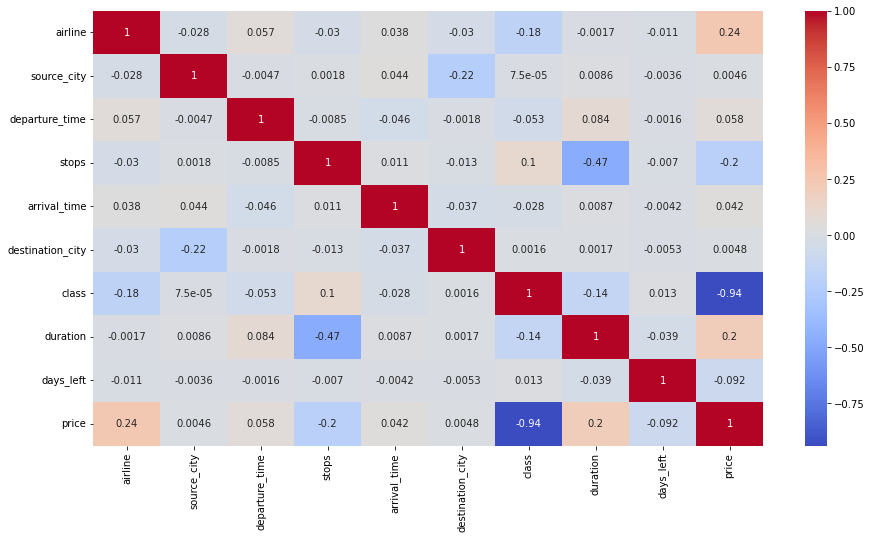

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(fbpp.corr(),annot=True,cmap='coolwarm')
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in fbpp.columns:
    if ((fbpp[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = fbpp[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [31]:
fbpp = fbpp.drop(['flight'],axis = 1)

In [32]:
X = fbpp.drop(['price'],axis = 1)
y = fbpp['price']

### ML time....

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [75]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Actual_Value","Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [77]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.904554350718816

In [78]:
mae = mean_absolute_error(y_test, y_pred)
mae

4624.9948680168745

In [79]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.4353581089683267

In [80]:
mse = mean_squared_error(y_test, y_pred)
mse

49200540.293721996

In [81]:
rmse = np.sqrt(mse)
rmse

7014.3096804833185

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


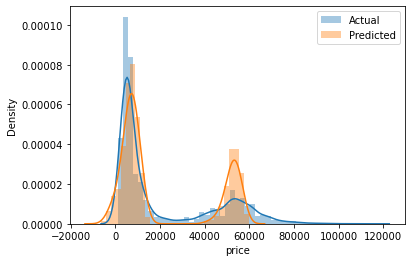

In [82]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)

In [85]:
mae1 = mean_absolute_error(y_test, y_pred1)
mae1

1177.7459784666812

In [86]:
mse1 = mean_squared_error(y_test, y_pred1)
mse1

12697749.999817224

In [87]:
rmse1 = np.sqrt(mse1)
rmse1

3563.3902396197395

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


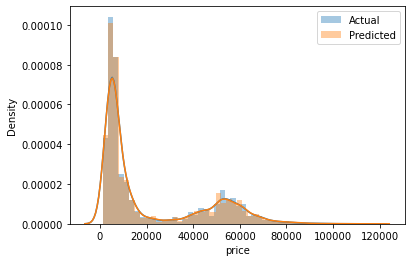

In [88]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred1, label='Predicted')
plt.legend()

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfg = RandomForestRegressor()
rfg.fit(x_train, y_train)
y_pred2 = rfg.predict(x_test)

In [92]:
mae2 = mean_absolute_error(y_test, y_pred2)
mae2

1088.970989194802

In [93]:
mse2 = mean_squared_error(y_test, y_pred2)
mse2

7756118.432996032

In [94]:
rmse2 = np.sqrt(mse2)
rmse2

2784.9808676175912

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


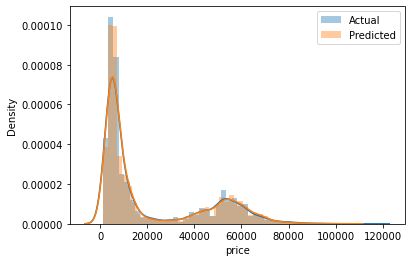

In [95]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred2, label='Predicted')
plt.legend()